# Exercises for EBT617E - Week 2

## Bloch Theorem

An energy eigenstate in a periodic potential can be written as 

$$ \Psi_k(z) = \mathrm{e}^{ikz} u_k(z) $$

Since the potential $V(z)$ and the $u_k(z)$ functions are periodic in $z$ with period $a$, they can be written as a Fourier series

$$ V(z) = V(z+a) = \sum_n V_n \mathrm{e}^{i2\pi n z /a} = \sum_n V_n \mathrm{e}^{iG_n z} \qquad \mathrm{and} \qquad  u_k(z) = \sum_n u_{k,n} \mathrm{e}^{iG_n z} $$

where $G_n = \frac{2\pi}{a} n$ are the reciprocal lattice vectors. Since any $k' = (k+G_n)$ with $k \in [-\pi/a,\pi/a)$ in the BZ, we can label the states with the indices $(k,n)$.

The Schrödinger equation 

$$ \left[ \frac{\hbar^2 \mathrm{d}^2}{2m \mathrm{d}z^2} + V(z) \right] \Psi_k(z) = E_k \Psi_k(z) $$

can be written in Fourier space as 

$$ \epsilon_{k+G_n} u_{k,n}  + \sum_m V_m u_{k,n-m} = E_k u_{k,n} $$

where $\epsilon_{k+G_n} = \frac{\hbar^2 (k+G_n)^2}{2m}$. For example, for a potential with only $V_{\pm 1}$ nonvanishing, we have a tridiagonal band matrix of the following form:

\begin{equation}
    \begin{pmatrix} \ddots &                 &                        &                   &                     &   & & \\
                    \ddots & \ddots          &   \ddots               &                   &                     &   & &  \\
                           & V_{-1}          &  \epsilon_{k,G_{-1}}   &  V_1              &                     &   & &\\
                           &                 &    V_{-1}              &  \epsilon_{k,G_0} &  V_1                &   & &  \\
                           &                 &                        &  V_{-1}           & \epsilon_{k,G_1}    & V_1 & &\\
                           & & & &\ddots &\ddots &\ddots &  \\
                           & & & & & &\ddots &
                                                \end{pmatrix}  
                    \begin{pmatrix} \vdots \\ \vdots \\ u_1 \\ u_0 \\ u_{\textit{-}1} \\ \vdots \\ \vdots \end{pmatrix}
                    =
                   E_k \begin{pmatrix} \vdots \\ \vdots \\ u_1 \\ u_0 \\ u_{\textit{-}1} \\ \vdots \\ \vdots \end{pmatrix} 
\end{equation}


Scaling:

$$ z' = z / a, \qquad k' = ka, \qquad E' = E / (\hbar^2/2ma^2) $$

so that $k \in [-\pi,\pi)$.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# k in [-pi,pi]
def ϵkG(k,n):
    G = 2*np.pi*n
    return (G+k)**2

In [37]:
# number of bands is 2*nmax+1
nmax = 50
dB = 2*nmax+1

# number of points in the Brillouin zone
Nk = 2**8

kk, dk = np.linspace(-np.pi,np.pi,Nk,endpoint=True,retstep=True)

Potential 

$$ V(x) = -V_\mathrm{max} \cos (2 \pi x/a) $$

In [38]:
Vmax = 1

def Vcrystal(x):
    return -Vmax*np.cos(2*np.pi*x)

dF = 1
FCoeffs = np.zeros(2*dF+1)
FCoeffs[0] = -Vmax/2 
FCoeffs[1] = 0
FCoeffs[2] = -Vmax/2

In [39]:
# real-Fourier space transform

# real space mesh
Nz = 201
zmax = 0.5
zz = np.linspace(-zmax,zmax,Nz,endpoint=True)

nn = np.arange(-dF,dF+1)

expqnz= np.exp(1j*2*np.pi*np.outer(zz,nn))

Text(0.5, 0, 'V(z)')

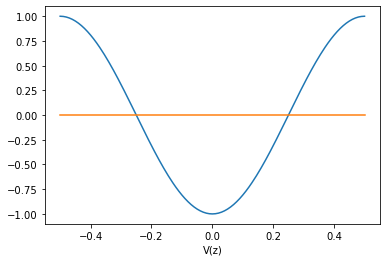

In [40]:
# plot the periodic potential using Fourier coefficients
Vz = expqnz@FCoeffs
plt.plot(zz,Vz.real)
plt.plot(zz,Vz.imag)
plt.xlabel("z/a")
plt.xlabel("V(z)")

In [41]:
def FMat(FCoeffs, nmax):
    dB = 2*nmax+1
    MM = np.zeros([dB,dB])
    dM = len(FCoeffs)//2+1
    for iFc,Fc in enumerate(FCoeffs):
        MM+=np.diag([Fc]*(dB-np.abs(-dM+iFc+1)),-dM+iFc+1)
    return MM # +MM.T

def Hband(nmax,k,VFMat):
    nn = np.arange(-nmax,nmax+1)
    HH = np.diag(ϵkG(k,nn))
    HH+= VFMat
    return HH

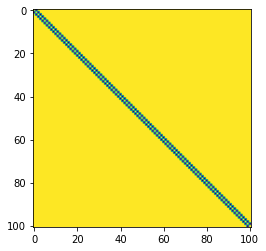

In [42]:
plt.imshow(FMat(FCoeffs, nmax))

In [43]:
k=0
VFMat = FMat(FCoeffs, nmax)
Hb    = Hband(nmax,k,VFMat)

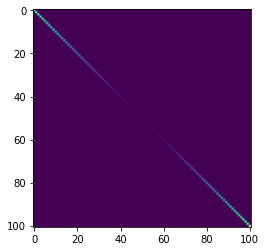

In [44]:
plt.imshow(Hb)

In [45]:
Ebands=[]
for k in kk:
    Hb = Hband(nmax,k,VFMat)
    ee, uu = np.linalg.eigh(Hb)
    Ebands.append(ee)
    
Ebands=np.array(Ebands)

## Density of States

Use broadening of energy levels

$$ \frac{1}{x-x_0-i\epsilon} = \frac{x-x_0}{(x-x_0)^2 + \epsilon^2}+ i\frac{\epsilon}{(x-x_0)^2 + \epsilon^2} $$

$$ \frac{1}{x-x_0-i\epsilon} = \mathcal{P}\frac{1}{(x-x_0)}+ i\pi \delta(x-x_0) $$


Density of states

$$ \rho(E) = \int \mathrm{d}E' \delta(E-E') $$

In [46]:
def get_dos(x,EE,ϵ=0.01):
    return np.imag(np.sum(1/(x-EE-1j*ϵ)))/(len(EE)*np.pi)

In [47]:
get_dos(0, Ebands)

1.1797524342104169

In [48]:
Ebands[:,:2].flatten().max()

39.32786474690782

In [49]:
%%time
Earr = np.linspace(0.8*Ebands[:,:2].flatten().min(), Ebands[:,:2].flatten().max(), 401)
ϵ=0.1
Edos = [get_dos(Eval, Ebands[:,:3].flatten(), ϵ=ϵ) for Eval in Earr]

CPU times: user 6.92 ms, sys: 0 ns, total: 6.92 ms
Wall time: 6.62 ms


ΔE = 1.0, |2V_G| = 1.0


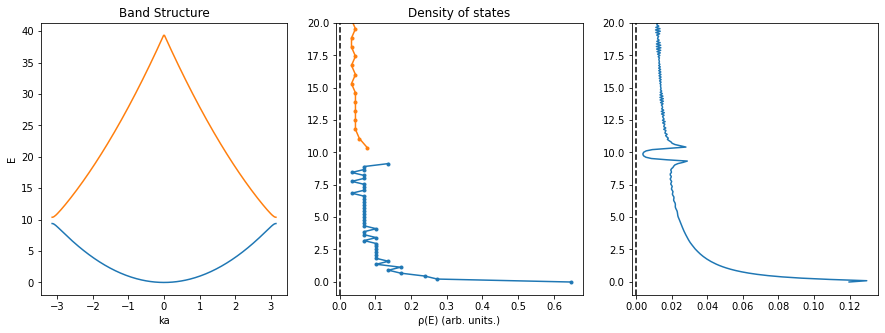

In [50]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

Nbands=2
# plot the first two bands
for ni,n in enumerate(nn[:Nbands]):
    ax[0].plot(kk,Ebands[:,ni],'-')
    ρE, Ea = np.histogram(Ebands[:,ni], bins=41, density=True)
    ax[1].plot(ρE,Ea[:-1],'.-')
# energy gap between 1st and 2nd band
# plt.axhline(y=Ebands[-1,0], ls='--', color="gray")
# plt.axhline(y=Ebands[-1,1], ls='--', color="gray")

ax[2].plot(Edos,Earr,'-')

print(f'ΔE = {Ebands[0,1] - Ebands[0,0]:.3}, |2V_G| = {2*abs(FCoeffs[-1]):3}')

#plt.ylim([Ebands[0,0]*.8,Ebands[0,1]*1.2])
ax[0].set_ylabel("E")
ax[0].set_xlabel("ka")
ax[0].set_title("Band Structure")
ax[1].set_xlabel("ρ(E) (arb. units.)")
ax[1].set_title("Density of states");

ax[1].set_ylim([-1,20])
ax[1].axvline(0,ls='--',c='k')
ax[2].set_ylim([-1,20])
ax[2].axvline(0,ls='--',c='k')


In [51]:
# real-Fourier space transform
nn = np.arange(-nmax,nmax+1)

# create the transformation matrix for the z-mesh
# for k=0!
expqnz = np.exp(1j*2*np.pi*np.outer(zz,nn))

Text(0, 0.5, 'u(z)')

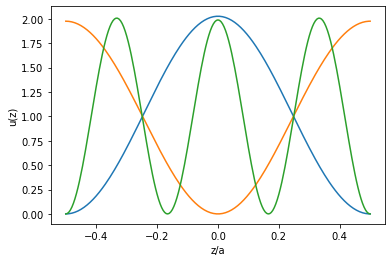

In [52]:
# plot the real space wave function for an eigenstate

for iz in range(3):
    uz = expqnz@uu[:,iz]
    plt.plot(zz,np.abs(uz)**2)
plt.xlabel("z/a")
plt.ylabel("u(z)")

In [53]:
Ebands=[]
for k in kk:
    Hb = Hband(nmax,k,VFMat)
    ee, uu = np.linalg.eigh(Hb)
    Ebands.append(ee)
    
Ebands=np.array(Ebands)

# Wannier orbitals

In [54]:
uu.shape

(101, 101)

$$ W_n(z-Z) = \sum_k \psi_{nk}(z) e^{-ikZ} = \sum_k u_{nk}(z) e^{ikz} e^{i\phi_k} e^{-ikZ} $$ 

In [55]:
Nz = 1001
zmax = 10
zz, dz = np.linspace(-zmax,zmax,Nz,endpoint=True,retstep=True)

# create the transformation matrix for the z-mesh
expqnz= np.exp(1j*2*np.pi*np.outer(zz,nn))

# obtain u_kn(z) functions for each k in BZ
uz_kn = []
for k in kk:
    Hb = Hband(nmax,k,VFMat)
    ee, uu = np.linalg.eigh(Hb)
    uzn = expqnz@uu/Nz
    uz_kn.append(uzn)
    
uz_kn = np.array(uz_kn)

In [56]:
uz_kn.shape

(256, 1001, 101)

In [57]:
# Wannier function position
ZW = 0
expzk = np.exp( np.outer(1j*kk,zz-ZW) )
ZW1 = ZW+1
expzk1 = np.exp( np.outer(1j*kk,zz-ZW1) )
ZW2 = ZW1+1
expzk2 = np.exp( np.outer(1j*kk,zz-ZW2) )

In [58]:
# Choose a band index
iband = 0
Wzn = expzk*uz_kn[:,:,iband]
Wzn1 = expzk1*uz_kn[:,:,iband]
Wzn2 = expzk2*uz_kn[:,:,iband]

In [59]:
Wzn.shape

(256, 1001)

Text(0, 0.5, '$P(z)$')

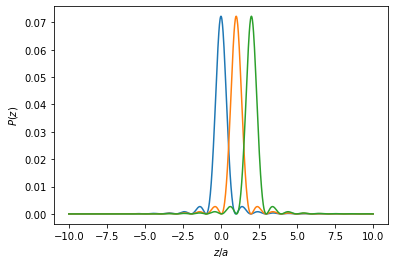

In [60]:
plt.plot(zz,np.abs(np.sum(Wzn, axis=0))**2,'-')
plt.plot(zz,np.abs(np.sum(Wzn1, axis=0))**2,'-')
plt.plot(zz,np.abs(np.sum(Wzn2, axis=0))**2,'-')

plt.xlabel(r"$z/a$")
plt.ylabel(r"$P(z)$")

## Construction of a tight-binding model from Wannier orbitals

Let's just take one orbital from the lowest band.

Overlap integrals

$$ t^{(n)} = \int \mathrm{d}z \, W^*(z-Z_n) \, H(z) \, W(z) $$

Below with second n.n. hoppings the resulting band structure is

$$ E_k = t^{(0)} + 2t^{(1)}\cos(k) + 2t^{(2)}\cos(2k) $$

In [61]:
Wz0 = np.sum(Wzn, axis=0)
Wz1 = np.sum(Wzn1, axis=0)
Wz2 = np.sum(Wzn2, axis=0)

In [62]:
# check normalization
NormWz = np.sum(np.conj(Wz0)*Wz0)*dz
NormWz

(0.06437939082421533+0j)

In [63]:
# check orthogonality
np.sum(np.conj(Wz1)*Wz0)*dz

(0.0005164948790171009+4.7898719539267714e-18j)

In [64]:
# onsite energy 
Vlat = Vcrystal(zz)
ϵn = np.sum( np.gradient(np.conj(Wz0),dz)*np.gradient(Wz0,dz) )*dz
ϵn += np.sum( np.abs(Wz0)**2*Vlat )*dz

# n.n. hopping 
tt = np.sum( np.gradient(np.conj(Wz1),dz)*np.gradient(Wz0,dz) )*dz
tt += np.sum( np.conj(Wz1)*Vlat*Wz0 )*dz

# n.n.n. hopping
tt2 = np.sum( np.gradient(np.conj(Wz2),dz)*np.gradient(Wz0,dz) )*dz
tt2 += np.sum( np.conj(Wz2)*Vlat*Wz0 )*dz

In [65]:
ϵn, tt, tt2

((0.20619156324675686+0j),
 (-0.12351793081370391+8.309866997740776e-18j),
 (0.02649017818354519+2.1409060552784377e-18j))

In [66]:
xf = 1/NormWz
Ntb = Nk

# One can add PBC..
HMtb = np.diag([xf*tt]*(Ntb-1)          , k=1)
HMtb += np.diag([np.conj(xf*tt)]*(Ntb-1), k=-1)

HMtb += np.diag([xf*ϵn.real]*Ntb, k=0)

HMtb += np.diag([xf*tt2]*(Ntb-2)          , k=2)
HMtb += np.diag([np.conj(xf*tt2)]*(Ntb-2), k=-2)

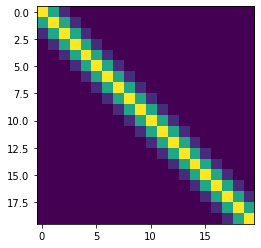

In [67]:
plt.imshow(abs(HMtb)[:20,:20])

In [68]:
EEtb, UUtb = np.linalg.eigh(HMtb)

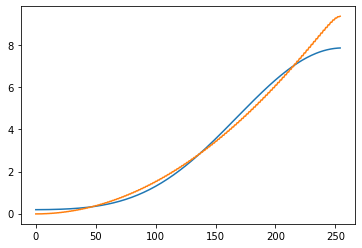

In [69]:
Neigs = -1
plt.plot(EEtb[:Neigs])
plt.plot(np.sort(Ebands[:,iband])[:Neigs])

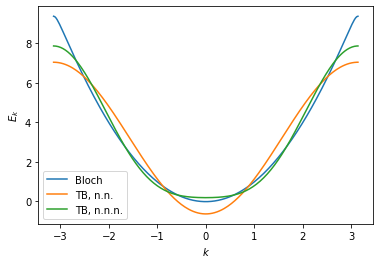

In [70]:
plt.plot(kk,Ebands[:,0], label="Bloch")
plt.plot(kk, xf.real*(ϵn.real-2*np.abs(tt)*np.cos(kk)+0*np.abs(tt2)*np.cos(2*kk)), label="TB, n.n." )
plt.plot(kk, xf.real*(ϵn.real-2*np.abs(tt)*np.cos(kk)+2*np.abs(tt2)*np.cos(2*kk)), label="TB, n.n.n." )
plt.xlabel("$k$")
plt.ylabel("$E_k$")
plt.legend();